In [8]:
import glob
from PIL import Image
import numpy as np 
import os
import cv2
import matplotlib 
files = [f for f in glob.glob('label/*/*/*/*')]
'''
files = []
for _,_,c in os.walk('label/'):
    files.append(c)
'''   
print(len(files))

for ind, filename in enumerate(files):
    img = np.asarray(cv2.imread(filename))
    img[img>0] = 255
    cv2.imwrite(filename,img)
    if ind%1000==0:
        print(ind)
    

135014
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000


In [61]:
with open("train.txt") as f:
    lines = f.read()
    image_path = lines.split('\n')
    image_path  = image_path[:-1]
    #lines = 'label/laneseg_label_w16/' + lines
    print(len(image_path))
    white = 0
    black = 0
    total = 0
    for i in range(len(image_path)):
        img = np.array(Image.open('.'+'/label/laneseg_label_w16' + image_path[i][:-3] + 'png'))
        white+=np.sum((img==[255,255,255]))
        black+=np.sum((img==[0,0,0]))
        total+=1640*590
        if i %1000 == 0:
            print(i)
    f_white = float(white)/total
    f_black = float(black)/total
    print(float(1/f_white))
    print(float(1/f_black))

88880
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
10.8267576718
0.343921975089


In [12]:
from shutil import copyfile
import tensorflow as tf
from PIL import Image
import numpy as np
import time
#img = np.array(Image.open('label/laneseg_label_w16/driver_23_30frame/05151649_0422.MP4/00000.jpg'))
with open("train.txt") as f:
    lines = f.read()
    image_path = lines.split('\n')
    tfrecords_filename = './lane_train.tfrecords'
    writer = tf.python_io.TFRecordWriter(tfrecords_filename)
    img_raw = tf.placeholder(tf.uint8)
    encode_jpeg = tf.image.encode_jpeg(img_raw)
    mask_raw = tf.placeholder(tf.uint8)
    encode_png = tf.image.encode_png(mask_raw)
    session = tf.Session()
    for i in range(len(image_path)):
        img = np.array(Image.open('.'+image_path[i]))
        mask = np.array(Image.open('.'+'/label/laneseg_label_w16' + image_path[i][:-3] + 'png'))
        #img = img[-512:, :,:]
        #mask = mask[-512:,:,:]
        #print(np.shape(mask))
        height = img.shape[0]
        width = img.shape[1]
        #img_raw=img.tostring()
        #mask_orig_raw=mask.tostring()
        jpeg_bytes = session.run([encode_jpeg], feed_dict={img_raw: img})
        png_bytes = session.run([encode_png], feed_dict={mask_raw: mask})
        example = tf.train.Example(features=tf.train.Features(feature = {
                'image_raw': tf.train.Feature(bytes_list = tf.train.BytesList(value = jpeg_bytes)),
                'mask_raw': tf.train.Feature(bytes_list = tf.train.BytesList(value = png_bytes)),
                #'height': tf.train.Feature(int64_list = tf.train.Int64List(value = [height])),
                #'width': tf.train.Feature(int64_list = tf.train.Int64List(value = [width]))
             }))
        writer.write(example.SerializeToString())
        
        if i%1000 == 0:
            print(i)
            
    writer.close()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000


IOError: [Errno 21] Is a directory: '.'

In [49]:
from shutil import copyfile
import tensorflow as tf
from PIL import Image
import numpy as np

#img = np.array(Image.open('label/laneseg_label_w16/driver_23_30frame/05151649_0422.MP4/00000.jpg'))
with open("val.txt") as f:
    lines = f.read()
    image_path = lines.split('\n')
    image_path  = image_path[:-1]
    tfrecords_filename = './lane_val.tfrecords'
    writer = tf.python_io.TFRecordWriter(tfrecords_filename)
    img_raw = tf.placeholder(tf.uint8)
    encode_jpeg = tf.image.encode_jpeg(img_raw)
    mask_raw = tf.placeholder(tf.uint8)
    encode_png = tf.image.encode_png(mask_raw)
    for i in range(len(image_path)):
        img = np.array(Image.open('.'+image_path[i]))
        mask = np.array(Image.open('.'+'/label/laneseg_label_w16' + image_path[i][:-3] + 'png'))
        img = img[7:583, 4:1636,:]
        mask = mask[7:583, 4:1636,:]
        #print(np.shape(mask))
        height = img.shape[0]
        width = img.shape[1]
        #img_raw=img.tostring()
        #mask_orig_raw=mask.tostring()
        jpeg_bytes = session.run([encode_jpeg], feed_dict={img_raw: img})
        png_bytes = session.run([encode_png], feed_dict={mask_raw: mask})
        example = tf.train.Example(features=tf.train.Features(feature = {
                'image_raw': tf.train.Feature(bytes_list = tf.train.BytesList(value = jpeg_bytes)),
                'mask_raw': tf.train.Feature(bytes_list = tf.train.BytesList(value = png_bytes)),
                #'height': tf.train.Feature(int64_list = tf.train.Int64List(value = [height])),
                #'width': tf.train.Feature(int64_list = tf.train.Int64List(value = [width]))
             }))
        writer.write(example.SerializeToString())
        if i%1000 == 0:
            print(i)
    writer.close()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [5]:
with open("train_gt.txt") as f:
    lines = f.read()
    lines = lines.split('\n')
    image = Image.open('.'+lines[0])
    tensor = tf.placeholder(tf.uint8)
    encode_jpeg = tf.image.encode_jpeg(tensor)
    jpeg_bytes = session.run(encode_jpeg, feed_dict={tensor: image})

TypeError: encode_jpeg() takes at least 1 argument (0 given)

(1, 1632, 576, 3)


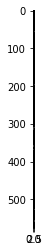

In [56]:
import matplotlib.pyplot as plt
def _extract_features1(example):
      features = {
          "image_raw": tf.FixedLenFeature([],tf.string),
          "mask_raw": tf.FixedLenFeature([],tf.string)
      }
      parsed_example = tf.parse_single_example(example, features)                      
      images = tf.image.decode_jpeg(parsed_example['image_raw'])
      images = tf.cast(images,tf.float32)
      masks = tf.cast(tf.image.decode_png(parsed_example['mask_raw']),tf.float32)
      
      height = 1632
      width = 576
      
      images_shape = tf.stack([height,width,3])
      images = tf.reshape(images,images_shape)
    
      masks_shape = tf.stack([height,width,3])
      masks = tf.reshape(masks,masks_shape)
      masks = tf.reduce_all(tf.equal(masks,[255,255,255]), axis = -1)
    
      images = tf.cast(images, tf.float32)
      masks = tf.cast(masks, tf.float32)
     
    
      images = tf.divide(images, 255)
      
    		
      return images,masks
filename1 = "lane_val.tfrecords"
data_train = tf.data.TFRecordDataset(filename1).shuffle(buffer_size=503)\
                                       .map(_extract_features1,num_parallel_calls=16)\
                                       .batch(1)\
                                       .prefetch(buffer_size=2)\
                                       .repeat()
iter_train = data_train.make_initializable_iterator()
train_img, train_label = iter_train.get_next()
sess = tf.Session()
sess.run(iter_train.initializer)
for i in range(100):
    a,b = sess.run([train_img,train_label])
print(np.shape(a))
plt.imshow(np.asarray(a[0][0]).astype('int'), cmap = 'gray')
plt.show()